<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/LSTM_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Models

## Tensorflow

Import Library & Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np

Preprocessing Data IMDb

In [2]:
# Parameter
num_words = 40000
maxlen = 400

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Build LSTM Model

In [3]:
def build_lstm_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
    model.add(tf.keras.layers.LSTM(128, return_sequences=True))
    model.add(tf.keras.layers.LSTM(64))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Train LSTM Model

In [6]:
model_lstm = build_lstm_model()
history_lstm = model_lstm.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.2)


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 576s 915ms/step - accuracy: 0.6842 - loss: 0.5693 - val_accuracy: 0.8582 - val_loss: 0.3466
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 619s 910ms/step - accuracy: 0.8903 - loss: 0.2904 - val_accuracy: 0.8474 - val_loss: 0.3693
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 568s 909ms/step - accuracy: 0.9454 - loss: 0.1607 - val_accuracy: 0.8696 - val_loss: 0.3858


Evaluasi Model LSTM

In [7]:
def evaluate_model(model, x_test, y_test):
    y_pred_probs = model.predict(x_test)
    y_pred = (y_pred_probs >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    f1_squared = f1 ** 2
    auc = roc_auc_score(y_test, y_pred_probs)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F1 Squared: {f1_squared:.4f}")
    print(f"AUC: {auc:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - LSTM')
    plt.legend()
    plt.grid()
    plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 261ms/step
Accuracy: 0.8561
Precision: 0.8976
Recall: 0.8040
F1 Score: 0.8482
F1 Squared: 0.7195
AUC: 0.9321


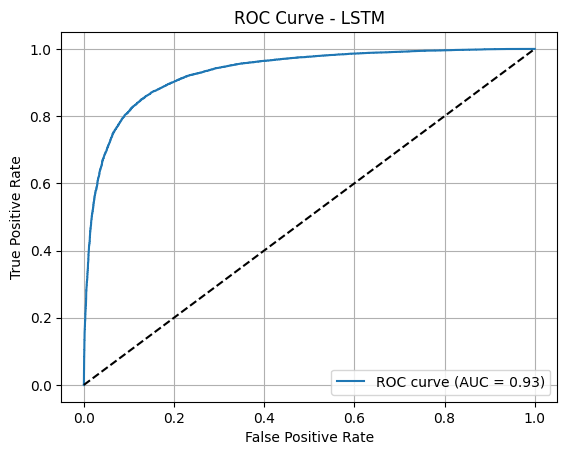

In [8]:
evaluate_model(model_lstm, x_test, y_test)


Visualisasi Akurasi dan Loss

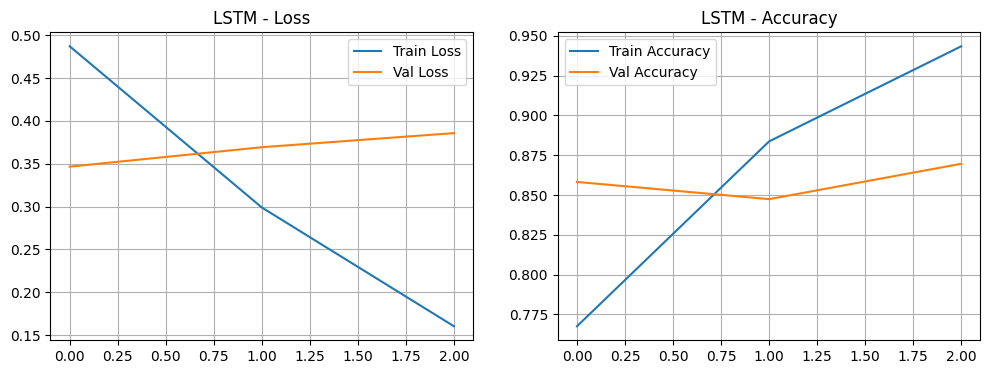

In [9]:
def plot_history(history, title=''):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.grid()

    plt.show()

plot_history(history_lstm, title='LSTM')


## Pytorch

Import Library & Load Dataset IMDb

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
!pip install torch==2.2.2 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install sympy==1.12 --quiet



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

Looking in indexes: https://download.pytorch.org/whl/cu118


Preprocessing Data

In [2]:
# Param
num_words = 40000
maxlen = 400

# Load IMDb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert to tensor
x_train_tensor = torch.tensor(x_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Dataset & Dataloader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


Build LSTM Model

In [3]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=0.3)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        out, (h_n, c_n) = self.lstm(x)
        x = h_n[-1]  # hidden state terakhir
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x).squeeze()


Train Model

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(vocab_size=num_words, embed_size=128, hidden_size=64, num_layers=2).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []

for epoch in range(3):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}")


Epoch 1: Train Loss = 0.5827
Epoch 2: Train Loss = 0.4888
Epoch 3: Train Loss = 0.4007


Evaluasi Model



In [8]:
model.eval()
y_true = []
y_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_probs.extend(outputs.cpu().detach().tolist())
        y_true.extend(labels.cpu().detach().tolist())


y_pred = np.array(y_probs) >= 0.5
y_true = np.array(y_true)


In [9]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
f1_squared = f1 ** 2
auc = roc_auc_score(y_true, y_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8177
Precision: 0.7642
Recall: 0.9188
F1 Score: 0.8344
F1 Squared: 0.6963
AUC: 0.9010


Visualisasi Loss & ROC Curve

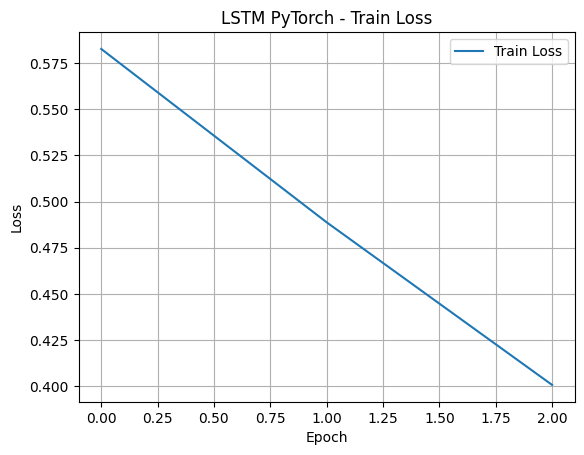

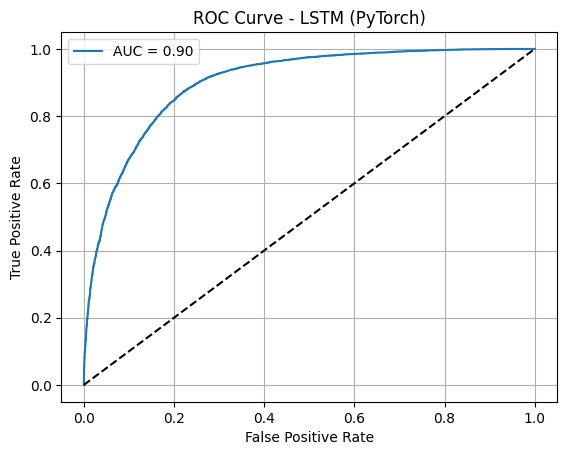

In [10]:
# Training Loss
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM PyTorch - Train Loss")
plt.legend()
plt.grid()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LSTM (PyTorch)")
plt.legend()
plt.grid()
plt.show()
